In [1]:
#libraries
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
from collections import Counter

#Data Visulaization
import matplotlib.pyplot as plt
import seaborn as sns

# Data transformation
from sklearn.preprocessing import LabelEncoder


In [2]:
#reading the data
data = pd.read_csv("census.csv")

# Data Cleansing

In [3]:
#looking at the data and its types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48841 entries, 0 to 48840
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   39             48841 non-null  int64 
 1   State-gov      48841 non-null  object
 2   77516          48841 non-null  int64 
 3   Bachelors      48841 non-null  object
 4   13             48841 non-null  int64 
 5   Never-married  48841 non-null  object
 6   Adm-clerical   48841 non-null  object
 7   Not-in-family  48841 non-null  object
 8   White          48841 non-null  object
 9   Male           48841 non-null  object
 10  2174           48841 non-null  int64 
 11  0              48841 non-null  int64 
 12  40             48841 non-null  int64 
 13  United-States  48841 non-null  object
 14  <=50K          48841 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [4]:
data.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [5]:
# adding column name to the respective columns
data.columns =['Age', 'Workclass', 'fnlwgt', 'Education','education-num', 'marital-status', 'occupation', 'relationship',
               'race', 'sex','capital-gain', 'capital-loss','hours-per-week','native-country','Salary']

## Finding missing values

In [6]:
#finding missing values
missing_values = data.isnull().sum()
print(missing_values)

Age               0
Workclass         0
fnlwgt            0
Education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
Salary            0
dtype: int64


In [7]:
data['Workclass'].unique()

array(['Self-emp-not-inc', 'Private', 'State-gov', 'Federal-gov',
       'Local-gov', '?', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [8]:
data['Education'].unique()

array(['Bachelors', 'HS-grad', '11th', 'Masters', '9th', 'Some-college',
       'Assoc-acdm', 'Assoc-voc', '7th-8th', 'Doctorate', 'Prof-school',
       '5th-6th', '10th', '1st-4th', 'Preschool', '12th'], dtype=object)

In [9]:
data['marital-status'].unique()

array(['Married-civ-spouse', 'Divorced', 'Married-spouse-absent',
       'Never-married', 'Separated', 'Married-AF-spouse', 'Widowed'],
      dtype=object)

In [10]:
data['occupation'].unique()

array(['Exec-managerial', 'Handlers-cleaners', 'Prof-specialty',
       'Other-service', 'Adm-clerical', 'Sales', 'Craft-repair',
       'Transport-moving', 'Farming-fishing', 'Machine-op-inspct',
       'Tech-support', '?', 'Protective-serv', 'Armed-Forces',
       'Priv-house-serv'], dtype=object)

In [11]:
data['relationship'].unique()

array(['Husband', 'Not-in-family', 'Wife', 'Own-child', 'Unmarried',
       'Other-relative'], dtype=object)

In [12]:
data['race'].unique()

array(['White', 'Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo',
       'Other'], dtype=object)

In [13]:
data['sex'].unique()

array(['Male', 'Female'], dtype=object)

In [14]:
data['native-country'].unique()

array(['United-States', 'Cuba', 'Jamaica', 'India', '?', 'Mexico',
       'South', 'Puerto-Rico', 'Honduras', 'England', 'Canada', 'Germany',
       'Iran', 'Philippines', 'Italy', 'Poland', 'Columbia', 'Cambodia',
       'Thailand', 'Ecuador', 'Laos', 'Taiwan', 'Haiti', 'Portugal',
       'Dominican-Republic', 'El-Salvador', 'France', 'Guatemala',
       'China', 'Japan', 'Yugoslavia', 'Peru',
       'Outlying-US(Guam-USVI-etc)', 'Scotland', 'Trinadad&Tobago',
       'Greece', 'Nicaragua', 'Vietnam', 'Hong', 'Ireland', 'Hungary',
       'Holand-Netherlands'], dtype=object)

In [15]:
count_rows_with_question_marks = 0

for index, row in data.iterrows():
    if '?' in row.values:
        count_rows_with_question_marks += 1

print("Total number of rows with question marks:", count_rows_with_question_marks)

Total number of rows with question marks: 3620


In [16]:
# Define the columns with ? values
columns_with_missing_values = ['Workclass', 'occupation','native-country']

# Replace "?" with the mode for each specified column
for column in columns_with_missing_values:
    mode_value = data[column].mode().values[0]  # Calculate the mode
    data[column] = data[column].replace('?', mode_value)


## Finding duplicates

In [17]:
#finding duplicates
duplicate_rows = data[data.duplicated()]
num_dup = data.duplicated().sum()
print(num_dup)
print(duplicate_rows)

53
       Age         Workclass  fnlwgt     Education  education-num  \
4880    25           Private  308144     Bachelors             13   
5103    90           Private   52386  Some-college             10   
9170    21           Private  250051  Some-college             10   
11630   20           Private  107658  Some-college             10   
13083   25           Private  195994       1st-4th              2   
15058   21           Private  243368     Preschool              1   
17039   46           Private  173243       HS-grad              9   
18554   30           Private  144593       HS-grad              9   
18697   19           Private   97261       HS-grad              9   
21317   19           Private  138153  Some-college             10   
21489   19           Private  146679  Some-college             10   
21874   49           Private   31267       7th-8th              4   
22299   25           Private  195994       1st-4th              2   
22366   44           Private  3

## Finding incosistent data types

In [18]:
#checking inconsistent data types
# Check data types
data_types = data.dtypes
print(data_types)

Age                int64
Workclass         object
fnlwgt             int64
Education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
Salary            object
dtype: object


## Checking for outliers

(array([8432., 8686., 9120., 9156., 5965., 3876., 2456.,  777.,  277.,
          96.]),
 array([17. , 24.3, 31.6, 38.9, 46.2, 53.5, 60.8, 68.1, 75.4, 82.7, 90. ]),
 <BarContainer object of 10 artists>)

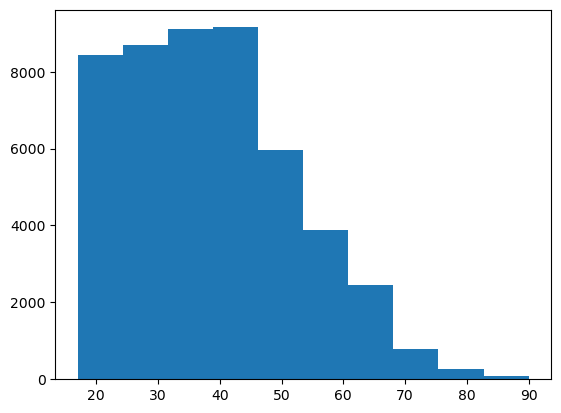

In [19]:
#checking for outliers in Age variable
plt.hist(data['Age'])

(array([  330.,   509.,  1711.,  1389.,  2469., 15784., 12939.,  1601.,
        10681.,  1428.]),
 array([ 1. ,  2.5,  4. ,  5.5,  7. ,  8.5, 10. , 11.5, 13. , 14.5, 16. ]),
 <BarContainer object of 10 artists>)

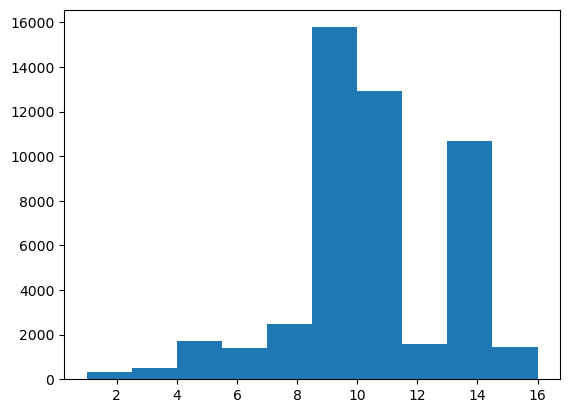

In [20]:
plt.hist(data['education-num'])

{'whiskers': [<matplotlib.lines.Line2D at 0x18e41ed3190>,
 'caps': [<matplotlib.lines.Line2D at 0x18e41ede310>,
 'boxes': [<matplotlib.lines.Line2D at 0x18e41f2f650>],
 'medians': [<matplotlib.lines.Line2D at 0x18e41f50290>],
 'fliers': [<matplotlib.lines.Line2D at 0x18e41ed6810>],
 'means': []}

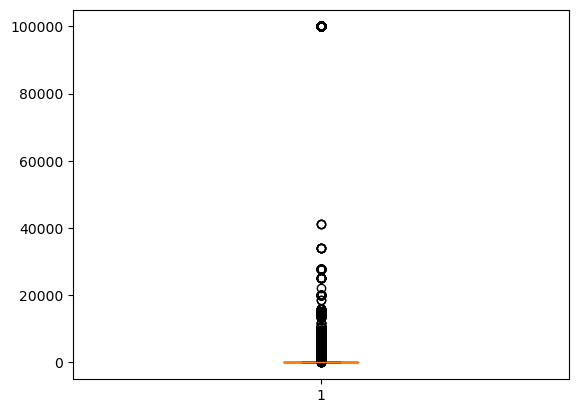

In [21]:
plt.boxplot(data['capital-gain'])

{'whiskers': [<matplotlib.lines.Line2D at 0x18e41ed4750>,
 'caps': [<matplotlib.lines.Line2D at 0x18e420f5ad0>,
 'boxes': [<matplotlib.lines.Line2D at 0x18e420e7690>],
 'medians': [<matplotlib.lines.Line2D at 0x18e420f7150>],
 'fliers': [<matplotlib.lines.Line2D at 0x18e420f7a90>],
 'means': []}

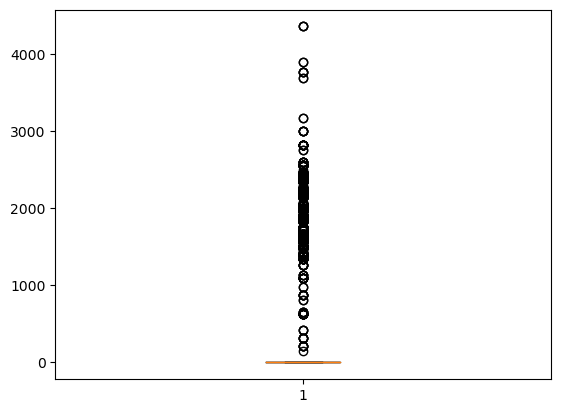

In [22]:
plt.boxplot(data['capital-loss'])

(array([ 1125.,  3328.,  3398., 26638.,  4671.,  5828.,  2642.,   683.,
          315.,   213.]),
 array([ 1. , 10.8, 20.6, 30.4, 40.2, 50. , 59.8, 69.6, 79.4, 89.2, 99. ]),
 <BarContainer object of 10 artists>)

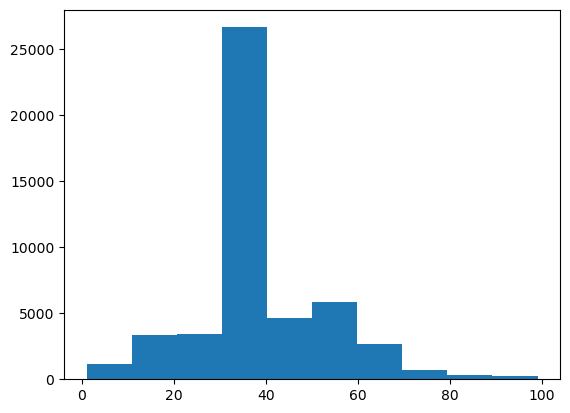

In [23]:
plt.hist(data['hours-per-week'])

## Removing unecessary columns

In [24]:
# Converting Salary column to low Income/ High Icnome columns as this is the aim of the assignment
# create a list of our conditions
conditions = [
    (data['Salary'] == '<=50K'),
    (data['Salary'] == '>50K') ]

# create a list of the values we want to assign for each condition
values = ['Low Income', 'High Income']

# create a new column and use np.select to assign values to it using our lists as arguments
data['Income'] = np.select(conditions, values)

# display updated DataFrame
data.head()

,Age,Workclass,fnlwgt,Education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Salary,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,Low Income
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,Low Income
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,Low Income
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,Low Income
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K,Low Income


In [25]:
# Dropping Salary Column
data.drop(columns = ['Salary'],inplace=True)

In [26]:
# dropping fnlwgt column
data.drop(columns = ['fnlwgt'],inplace=True)

In [27]:
data.head()

,Age,Workclass,Education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,Low Income
1,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,Low Income
2,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,Low Income
3,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,Low Income
4,37,Private,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,Low Income


# EDA

In [28]:
data.describe()

,Age,education-num,capital-gain,capital-loss,hours-per-week
count,48841.000000,48841.000000,48841.000000,48841.000000,48841.000000
mean,38.643578,10.078029,1079.045208,87.504105,40.422391
std,13.710650,2.570965,7452.093700,403.008483,12.391571
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,12.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [29]:
data.describe(include=['O'])

,Workclass,Education,marital-status,occupation,relationship,race,sex,native-country,Income
count,48841,48841,48841,48841,48841,48841,48841,48841,48841
unique,8,16,7,14,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,Low Income
freq,36705,15784,22379,8981,19716,41761,32649,44688,37154


In [30]:
capital_gain_percentile = [91.74,91.8,91.9,92,100]
capital_gain_perc = [np.percentile(data['capital-gain'],i) for i in capital_gain_percentile]
capital_gain_perc

[0.0, 594.0, 991.0, 1106.0000000000728, 99999.0]

In [31]:
capital_loss_percentile = [95.3,95.4,95.5,96,100]
capital_loss_perc = [np.percentile(data['capital-loss'],i) for i in capital_loss_percentile]
capital_loss_perc

[0.0, 709.5200000000914, 1380.0, 1590.0, 4356.0]

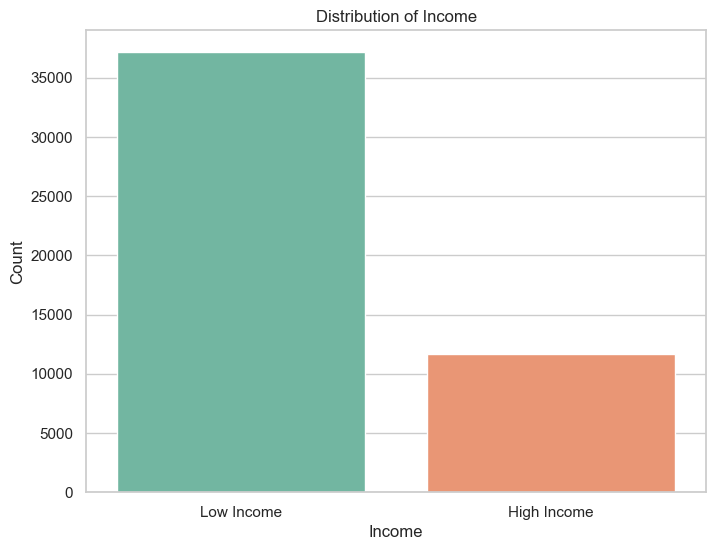

In [32]:
# Create a count plot for Income
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")
sns.countplot(x="Income", data=data, palette="Set2")

# Set labels and title
plt.xlabel("Income")
plt.ylabel("Count")
plt.title("Distribution of Income")

# Show the plot
plt.show()

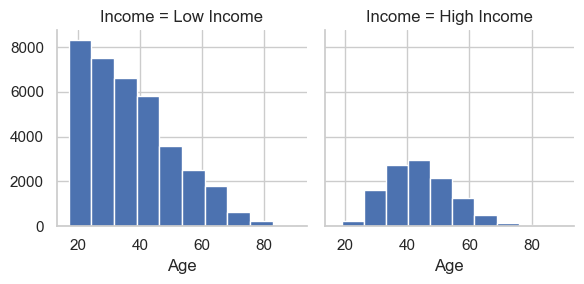

In [33]:
g = sns.FacetGrid(data, col='Income')
g.map(plt.hist, 'Age')

In [34]:
g.map(plt.hist, 'education-num')

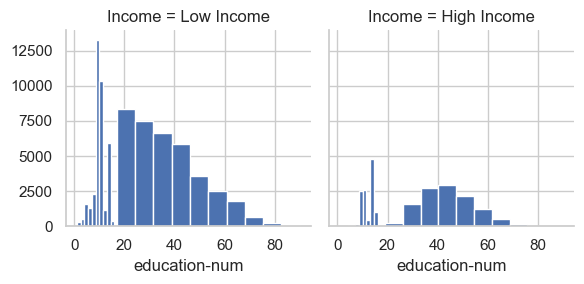

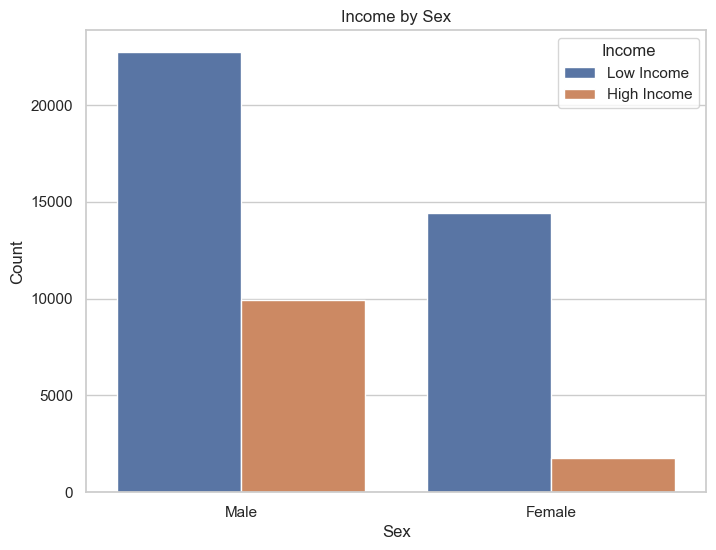

In [35]:
# Create a count plot
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.countplot(x="sex", hue="Income", data=data)

# Set labels and title
plt.xlabel("Sex")
plt.ylabel("Count")
plt.title("Income by Sex")

# Show the plot
plt.legend(title="Income", loc="upper right", labels=["Low Income", "High Income"])
plt.show()

In [36]:
data[["Income", "Workclass"]].groupby(['Workclass']).count().sort_values(by='Income', ascending=False)

,Income
Workclass,
Private,36705
Self-emp-not-inc,3862
Local-gov,3136
State-gov,1980
Self-emp-inc,1695
Federal-gov,1432
Without-pay,21
Never-worked,10


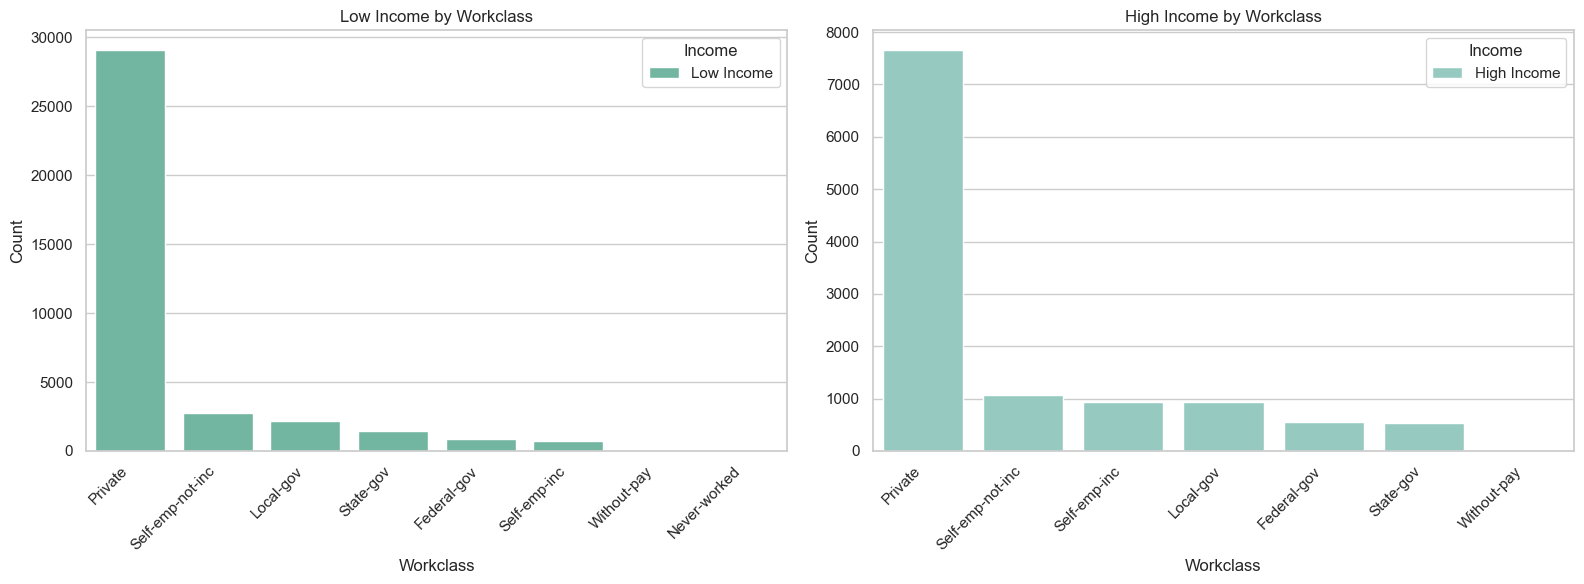

In [37]:
# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot for Low Income
low_income_counts = data[data['Income'] == 'Low Income']['Workclass'].value_counts().sort_values(ascending=False).index
sns.set(style="whitegrid")
sns.countplot(x="Workclass", hue="Income", data=data[data['Income'] == 'Low Income'], palette="Set2", ax=axes[0], order=low_income_counts)
axes[0].set_title("Low Income by Workclass")

# Plot for High Income
high_income_counts = data[data['Income'] == 'High Income']['Workclass'].value_counts().sort_values(ascending=False).index
sns.set(style="whitegrid")
sns.countplot(x="Workclass", hue="Income", data=data[data['Income'] == 'High Income'], palette="Set3", ax=axes[1], order=high_income_counts)
axes[1].set_title("High Income by Workclass")

# Rotate x-axis labels for better readability
for ax in axes:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

# Set labels and legends
for ax in axes:
    ax.set_xlabel("Workclass")
    ax.set_ylabel("Count")
    
# Show the plots
plt.tight_layout()
plt.show()

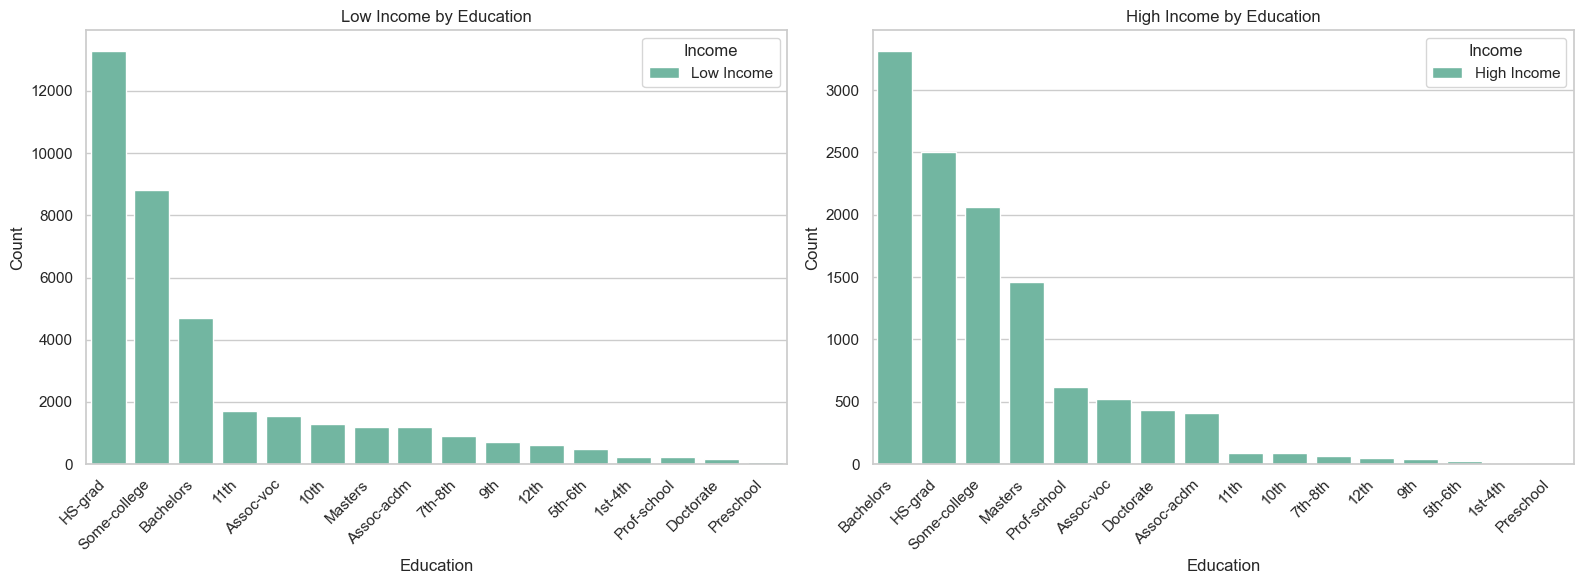

In [38]:
# Calculate the order of education levels by count for Low Income in the 'data' DataFrame
low_income_education_order = data[data['Income'] == 'Low Income']['Education'].value_counts().sort_values(ascending=False).index

# Calculate the order of education levels by count for High Income in the 'data' DataFrame
high_income_education_order = data[data['Income'] == 'High Income']['Education'].value_counts().sort_values(ascending=False).index

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot for Low Income by Education
sns.set(style="whitegrid")
sns.countplot(x="Education", hue="Income", data=data[data['Income'] == 'Low Income'], palette="Set2", ax=axes[0], order=low_income_education_order)
axes[0].set_title("Low Income by Education")

# Plot for High Income by Education
sns.set(style="whitegrid")
sns.countplot(x="Education", hue="Income", data=data[data['Income'] == 'High Income'], palette="Set2", ax=axes[1], order=high_income_education_order)
axes[1].set_title("High Income by Education")

# Rotate x-axis labels for better readability
for ax in axes:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

# Set labels and legends
for ax in axes:
    ax.set_xlabel("Education")
    ax.set_ylabel("Count")
    
# Show the plots
plt.tight_layout()
plt.show()

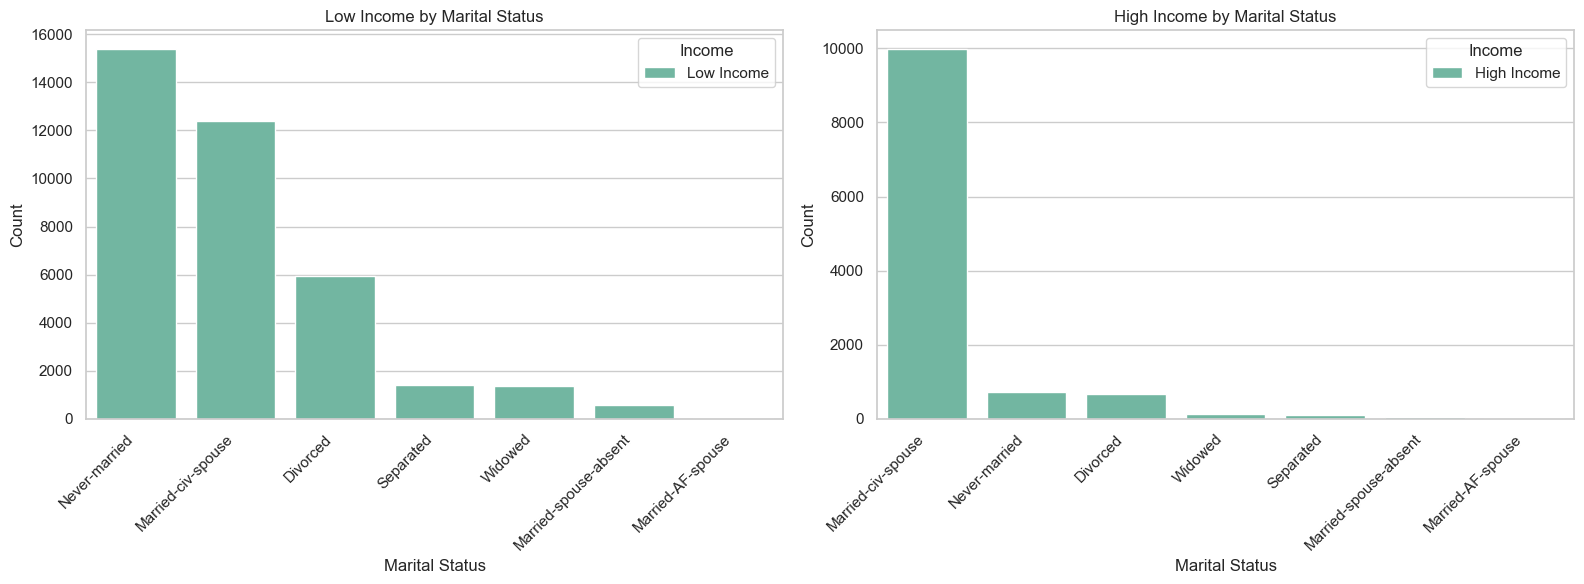

In [39]:
# 'Income' and 'marital-status' are the columns you want to plot

# Calculate the order of marital status by count for Low Income in the 'data' DataFrame
low_income_marital_order = data[data['Income'] == 'Low Income']['marital-status'].value_counts().sort_values(ascending=False).index

# Calculate the order of marital status by count for High Income in the 'data' DataFrame
high_income_marital_order = data[data['Income'] == 'High Income']['marital-status'].value_counts().sort_values(ascending=False).index

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot for Low Income by Marital Status
sns.set(style="whitegrid")
sns.countplot(x="marital-status", hue="Income", data=data[data['Income'] == 'Low Income'], palette="Set2", ax=axes[0], order=low_income_marital_order)
axes[0].set_title("Low Income by Marital Status")

# Plot for High Income by Marital Status
sns.set(style="whitegrid")
sns.countplot(x="marital-status", hue="Income", data=data[data['Income'] == 'High Income'], palette="Set2", ax=axes[1], order=high_income_marital_order)
axes[1].set_title("High Income by Marital Status")

# Rotate x-axis labels for better readability
for ax in axes:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

# Set labels and legends
for ax in axes:
    ax.set_xlabel("Marital Status")
    ax.set_ylabel("Count")
    
# Show the plots
plt.tight_layout()
plt.show()


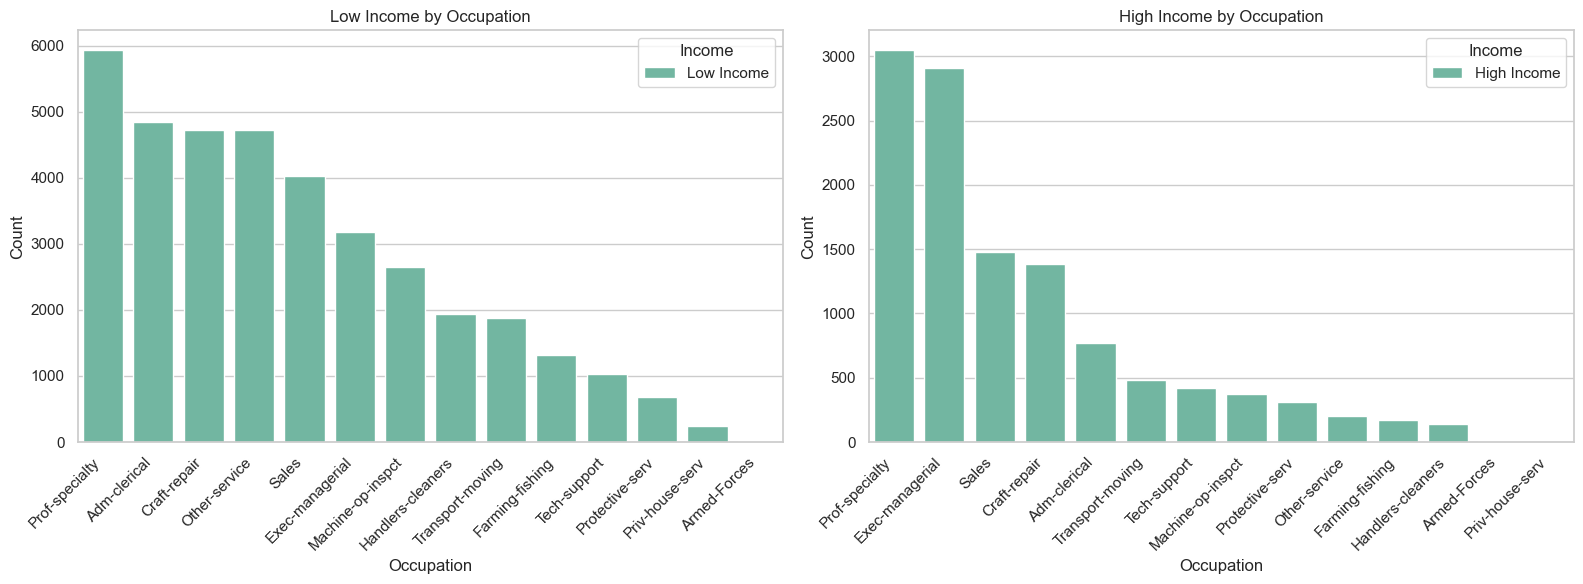

In [40]:
# Calculate the order of occupation categories by count for Low Income in the 'data' DataFrame
low_income_occupation_order = data[data['Income'] == 'Low Income']['occupation'].value_counts().sort_values(ascending=False).index

# Calculate the order of occupation categories by count for High Income in the 'data' DataFrame
high_income_occupation_order = data[data['Income'] == 'High Income']['occupation'].value_counts().sort_values(ascending=False).index

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot for Low Income by Occupation
sns.set(style="whitegrid")
sns.countplot(x="occupation", hue="Income", data=data[data['Income'] == 'Low Income'], palette="Set2", ax=axes[0], order=low_income_occupation_order)
axes[0].set_title("Low Income by Occupation")

# Plot for High Income by Occupation
sns.set(style="whitegrid")
sns.countplot(x="occupation", hue="Income", data=data[data['Income'] == 'High Income'], palette="Set2", ax=axes[1], order=high_income_occupation_order)
axes[1].set_title("High Income by Occupation")

# Rotate x-axis labels for better readability
for ax in axes:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

# Set labels and legends
for ax in axes:
    ax.set_xlabel("Occupation")
    ax.set_ylabel("Count")
    
# Show the plots
plt.tight_layout()
plt.show()


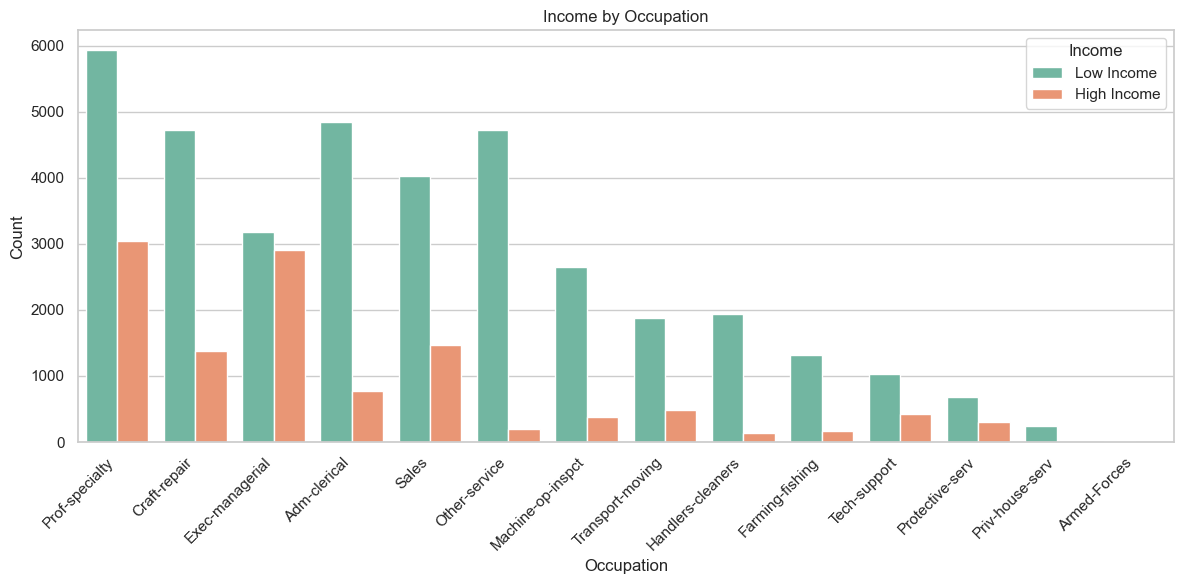

In [41]:
# Calculate the order of occupation categories by count in the 'data' DataFrame
occupation_order = data['occupation'].value_counts().sort_values(ascending=False).index

# Create a count plot for both Low Income and High Income by Occupation
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")
sns.countplot(x="occupation", hue="Income", data=data, palette="Set2", order=occupation_order)
plt.title("Income by Occupation")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha="right")

# Set labels and legends
plt.xlabel("Occupation")
plt.ylabel("Count")
plt.legend(title="Income", loc="upper right", labels=["Low Income", "High Income"])

# Show the plot
plt.tight_layout()
plt.show()

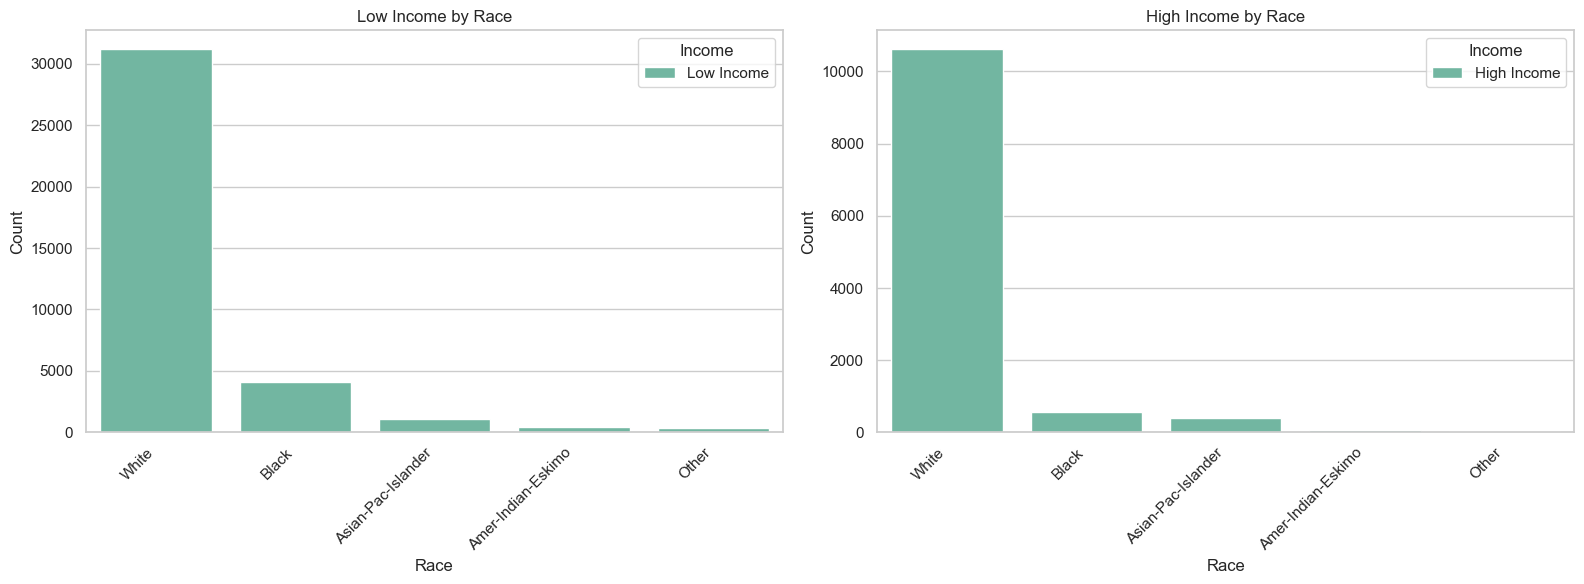

In [42]:

# Calculate the order of race categories by count for Low Income in the 'data' DataFrame
low_income_race_order = data[data['Income'] == 'Low Income']['race'].value_counts().sort_values(ascending=False).index

# Calculate the order of race categories by count for High Income in the 'data' DataFrame
high_income_race_order = data[data['Income'] == 'High Income']['race'].value_counts().sort_values(ascending=False).index

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot for Low Income by Race
sns.set(style="whitegrid")
sns.countplot(x="race", hue="Income", data=data[data['Income'] == 'Low Income'], palette="Set2", ax=axes[0], order=low_income_race_order)
axes[0].set_title("Low Income by Race")

# Plot for High Income by Race
sns.set(style="whitegrid")
sns.countplot(x="race", hue="Income", data=data[data['Income'] == 'High Income'], palette="Set2", ax=axes[1], order=high_income_race_order)
axes[1].set_title("High Income by Race")

# Rotate x-axis labels for better readability
for ax in axes:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

# Set labels and legends
for ax in axes:
    ax.set_xlabel("Race")
    ax.set_ylabel("Count")
    
# Show the plots
plt.tight_layout()
plt.show()


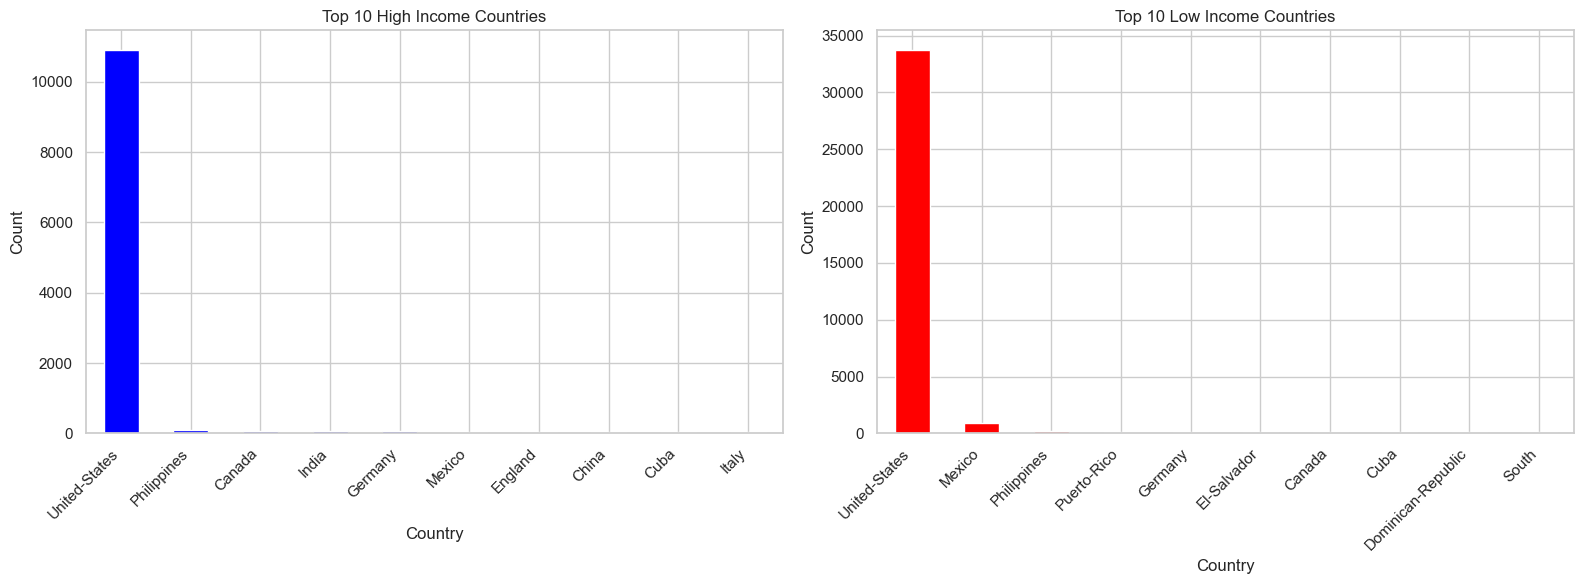

In [43]:
# Filter data for High Income and Low Income
high_income_data = data[data['Income'] == 'High Income']
low_income_data = data[data['Income'] == 'Low Income']

# Calculate the top 10 countries with high income
top_10_high_income_countries = high_income_data['native-country'].value_counts().head(10)

# Calculate the top 10 countries with low income
top_10_low_income_countries = low_income_data['native-country'].value_counts().head(10)

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot for Top 10 High Income Countries
top_10_high_income_countries.plot(kind='bar', ax=axes[0], color='blue')
axes[0].set_title("Top 10 High Income Countries")
axes[0].set_xlabel("Country")
axes[0].set_ylabel("Count")

# Plot for Top 10 Low Income Countries
top_10_low_income_countries.plot(kind='bar', ax=axes[1], color='red')
axes[1].set_title("Top 10 Low Income Countries")
axes[1].set_xlabel("Country")
axes[1].set_ylabel("Count")

# Rotate x-axis labels for better readability
for ax in axes:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

# Show the plots
plt.tight_layout()
plt.show()


# Feature Engineering

In [44]:
# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# Define a list of column names that contain categorical variables
categorical_columns = ['Workclass', 'Education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'Income']

# Apply label encoding to each categorical column
for column in categorical_columns:
    data[column] = label_encoder.fit_transform(data[column])


In [45]:
data.head()

,Age,Workclass,Education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,50,5,9,13,2,3,0,4,1,0,0,13,38,1
1,38,3,11,9,0,5,1,4,1,0,0,40,38,1
2,53,3,1,7,2,5,0,2,1,0,0,40,38,1
3,28,3,9,13,2,9,5,2,0,0,0,40,4,1
4,37,3,12,14,2,3,5,4,0,0,0,40,38,1


# Splitting Test and Train Data

In [46]:
# Set the random seed for reproducibility
np.random.seed(42)

# Generate shuffled indices
indices = np.random.permutation(len(data))

# Define the proportion of data for training
n_samples = int(0.7 * len(data))

# Split the data using the shuffled indices
train_data = data.iloc[indices[:n_samples], :-1]  # Select all columns except the last one for training data
train_labels = data.iloc[indices[:n_samples], -1]  # Select only the last column for training labels
test_data = data.iloc[indices[n_samples:], :-1]   # Select all columns except the last one for testing data
test_labels = data.iloc[indices[n_samples:], -1]   # Select only the last column for testing labels


In [47]:
## Print out their dimensions
print("Training dataset dimensions: ", np.shape(train_data))
print("Number of training labels: ", len(train_labels))
print("Testing dataset dimensions: ", np.shape(test_data))
print("Number of testing labels: ", len(test_labels))

Training dataset dimensions:  (34188, 13)
Number of training labels:  34188
Testing dataset dimensions:  (14653, 13)
Number of testing labels:  14653


## Calculating Squared Distance

In [48]:
def squared_dist(x,y):
    instance1= np.array(x)
    instance2 = np.array(y)
    return np.linalg.norm(instance1-instance2)

# Computing nearest neighbors

In [49]:
def get_neighbors(training_set,labels,test_instance,K,distance=squared_dist):
    distances = []
    for index in range(len(training_set)):
        dist = squared_dist(test_instance,training_set.iloc[index])
        distances.append((training_set.iloc[index], dist, labels.iloc[index]))
        distances.sort(key= lambda x: x[1])
        neighbors = distances[:K]
        return (neighbors)

In [50]:
def vote(neighbors):
    class_counter = Counter()
    for neighbor in neighbors:
        class_counter[neighbor[2]] += 1
    return class_counter.most_common(1)[0][0]

In [51]:
# Initialize an empty list to store test predictions
def error_rate(k):
    test_predictions = []
    for i in range(len(test_data)):
        neighbors = get_neighbors(train_data,
                                 train_labels,
                                 test_data.iloc[i],
                                 k,
                                 distance=squared_dist
                                 )
        # Make a prediction using the 'vote' function
        prediction = vote(neighbors)
        # Store the prediction in the 'test_predictions' list
        test_predictions.append(prediction)
    
    # Calculate the error rate (as explained in previous responses)
    err_positions = np.not_equal(test_predictions, test_labels)
    error_rate = float(np.sum(err_positions)) / len(test_labels)

    return error_rate


In [53]:
K=[1,2,3,4,5,6,7,8,9,10]
error_rates = [error_rate(k) for k in K]

In [54]:
error_rates

[0.24158875315635023,
 0.24158875315635023,
 0.24158875315635023,
 0.24158875315635023,
 0.24158875315635023,
 0.24158875315635023,
 0.24158875315635023,
 0.24158875315635023,
 0.24158875315635023,
 0.24158875315635023]